#逻辑回归实现，验证集a9atest.txt只有122个特征，手动在第一行添加了123：0    代码运行速度比较慢

In [1]:
from sklearn.datasets import load_svmlight_file
from numpy import *
from sklearn.model_selection import train_test_split
import math
data=load_svmlight_file(r'D:\a9a.txt')#读取训练集数据
datat=load_svmlight_file(r'D:\a9atest.txt')#读取验证集数据
X=data[0]
y=data[1]
Xt=datat[0]
yt=datat[1]
for i in range(32561):#将训练集的预测值-1改为0
    if y[i]==-1:
        y[i]=0
for i in range(16281):#将验证集的预测值-1改为0
    if yt[i]==-1:
        yt[i]=0
S=zeros((32561,123))
S=mat(S)
X=X+S
X=X.getA()
c=ones(X.shape[0])
X=insert(X, 0, values=c, axis=1)#向训练集插入一列1
X=mat(X)

St=zeros((16281,123))
St=mat(St)
Xt=Xt+St
Xt=Xt.getA()
ct=ones(Xt.shape[0])
Xt=insert(Xt, 0, values=ct, axis=1)#向验证集插入一列1
Xt=mat(Xt)

y=y.reshape(32561,1)
y=mat(y)
yt=yt.reshape(16281,1)
yt=mat(yt)

In [2]:
def sigmod(X):#定义sigmod函数
    h=1.0/(1+exp(-X))
    return h
def gradientfunction(X,y,W):#计算梯度
    h=sigmod(X*W)
    gradient=X.transpose()*(h-y)
    return gradient
def lossfunction(X,y,W):#计算loss
    n=X.shape[0]
    J=0
    for i in range(n):
        J=J+y[i,0]*log(sigmod(X[i,:]*W))+(1-y[i,0])*log(1-sigmod(X[i,:]*W))
    J=-J/n
    return J
def predictscore(X,y,W):
    m=X.shape[0]
    count=0
    for i in range(m):
        h=sigmod(X[i]*W)
        if h>=0.5 and int(y[i,0])==1:
            count=count+1
        elif h<0.5 and y[i,0]==0:
            count=count+1
    return count/m

In [3]:
#普通的SGD
W1=zeros((124,1))#将参数全部初始化为0
W1=mat(W1)
V1=zeros((124,1))#将参数全部初始化为0
V1=mat(V1)
num1=[]#存储迭代次数
loss1=[]#存储loss值
lamda1=0.1
for k in range(200):
    num1.append(k)
    i=random.randint(0,32561)#随机选取i
    G1=gradientfunction(X[i,:],y[i,0],W1)#计算梯度
    W1=W1-lamda1*G1#更新W
    loss=lossfunction(Xt,yt,W1)
    loss=loss.getA()
    loss1.append(loss[0][0])

In [6]:
#SGD的准确率
p1=predictscore(Xt,yt,W1)
print(p1)

0.8318285117621768


In [10]:
#NAG优化方法
W2=zeros((124,1))#将参数全部初始化为0
W2=mat(W2)
V2=zeros((124,1))#将参数全部初始化为0
V2=mat(V2)
r2=0.9
num2=[]#存储迭代次数
loss2=[]#存储loss值
lamda2=0.01
for k in range(200):
    num2.append(k)
    i=random.randint(0,32561)
    W12=W2-r2*V2
    G2=gradientfunction(X[i,:],y[i,0],W12)
    V2=r2*V2+lamda2*G2
    W2=W2-V2
    loss=lossfunction(Xt,yt,W2)
    loss=loss.getA()
    loss2.append(loss[0][0])

In [12]:
#NAG的准确率
p2=predictscore(Xt,yt,W2)
print(p2)

0.8121736994042135


In [15]:
#RMSProp优化方法
W3=zeros((124,1))#将参数全部初始化为0
W3=mat(W3)
Gt3=zeros((124,1))
Gt3=mat(Gt3)
r3=0.9
num3=[]#存储迭代次数
loss3=[]#存储loss值
lamda3=0.01
e3=1e-8
for k in range(200):
    num3.append(k)
    i=random.randint(0,32561)
    G3=gradientfunction(X[i,:],y[i,0],W3)
    Gt3=r3*Gt3+(1-r3)*multiply(G3,G3)
    W3=W3-multiply((lamda3/sqrt(Gt3+e3)),G3)
    loss=lossfunction(Xt,yt,W3)
    loss=loss.getA()
    loss3.append(loss[0][0])

In [16]:
#RMSProp的准确率
p3=predictscore(Xt,yt,W3)
print(p3)

0.8070757324488668


In [20]:
#AdaDelta优化方法
W4=zeros((124,1))#将参数全部初始化为0
W4=mat(W4)
Gt4=zeros((124,1))
Gt4=mat(Gt4)
d4=zeros((124,1))
d4=mat(d4)
r4=0.9
num4=[]#存储迭代次数
loss4=[]#存储loss值
lamda4=0.2
e4=1e-8
for k in range(200):
    num4.append(k)
    i=random.randint(0,32561)
    G4=gradientfunction(X[i,:],y[i,0],W4)
    Gt4=r4*Gt4+(1-r4)*multiply(G4,G4)
    dw4=-multiply(sqrt(d4+e4)/sqrt(Gt4+e4),G4)
    W4=W4+dw4
    d4=r4*d4+(1-r4)*multiply(dw4,dw4)
    loss=lossfunction(Xt,yt,W4)
    loss=loss.getA()
    loss4.append(loss[0][0])

In [21]:
#AdaDelta的准确率
p4=predictscore(Xt,yt,W4)
print(p4)

0.7637737239727289


In [25]:
#Adam优化方法
W5=zeros((124,1))#将参数全部初始化为0
W5=mat(W5)
Gt5=zeros((124,1))
Gt5=mat(Gt5)
m5=zeros((124,1))
m5=mat(m5)
r5=0.999
num5=[]#存储迭代次数
loss5=[]#存储loss值
lamda5=0.2
e5=1e-8
B5=0.9
n5=0.001
for k in range(200):
    num5.append(k)
    i=random.randint(0,32561)
    G5=gradientfunction(X[i,:],y[i,0],W5)
    m5=B5*m5+(1-B5)*G5
    Gt5=r5*Gt5+(1-r5)*multiply(G5,G5)
    lamda5=n5*sqrt(1-r5)/(1-B5)
    W5=W5-lamda5*m5/sqrt(Gt5+e5)
    loss=lossfunction(Xt,yt,W5)
    loss=loss.getA()
    loss5.append(loss[0][0])

In [28]:
#Adam的准确率
p5=predictscore(Xt,yt,W5)
print(p5)

0.7637737239727289


Text(0,0.5,'loss')

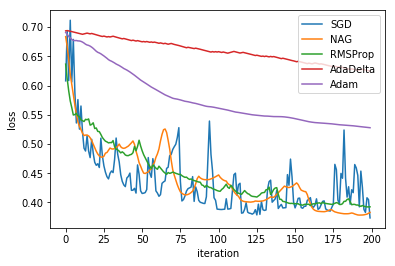

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(num1,loss1,label='SGD')
plt.plot(num2,loss2,label='NAG')
plt.plot(num3,loss3,label='RMSProp')
plt.plot(num4,loss4,label='AdaDelta')
plt.plot(num5,loss5,label='Adam')
plt.legend(loc=1)
plt.xlabel('iteration')
plt.ylabel('loss')